## 데이터 전처리

### 1.데이터 정제

In [80]:
import requests
import pandas as pd
from bs4 import BeautifulSoup
import os
import glob

In [14]:
csv_path = r'/home/aiffel0042/aiffel/news_crawler/news_fold/'
output_path = r'/home/aiffel0042/aiffel/news_crawler/result_fold/result.csv'

allFile_list = glob.glob(os.path.join(csv_path, 'news_*'))

allData = []
for file in allFile_list:
    rf = pd.read_csv(file)
    allData.append(rf)
    
dataCombine = pd.concat(allData, axis=0, ignore_index=True)
dataCombine.to_csv(output_path, index=False)

In [135]:
csv_path = os.getenv("HOME") + "/aiffel/news_crawler/result_fold/result.csv"
df = pd.read_table(csv_path, sep=',')
df.head()

,news,code
0,파주시청. 사진제공=파주시 파주시청. 사진제공=파주시\n\n[파주=파이낸셜뉴스 강근...,사회
1,동영상 뉴스\n\n이천 물류창고 화재 발화지점으로 지목된 지하 2층에서 산소절단기의...,사회
2,황범순 의정부시 부시장 을지대학교 의정부캠퍼스 및 부속병원 공사현장 안전점검. 사진...,사회
3,귀갓길 여성을 쫓아가 성범죄를 시도한 20대 남성이 구속됐습니다.서울 강남경찰서는 ...,사회
4,(서울=연합뉴스) 대한약사회가 6일부터 코로나바이러스 감염증 대응 체계를 '사회적 ...,사회


In [136]:
from sklearn.utils import shuffle
df = shuffle(df)

In [137]:
# 정규 표현식을 이용해서 한글 외의 문자는 전부 제거합니다.
df['news'] = df['news'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
df['news']

4878     국내 제약바이오사가 신종 코로나바이러스 감염증코로나 사태 이후 첫 실적발표에서 우려...
8398     삼성전자 중저가 스마트폰 갤럭시  삼성전자 제공 삼성전자 중저가 스마트폰 갤럭시  ...
5031     머리를 긁고 있는 오랑우탄 몸을 긁는 행동을 따라 하는 것은 부정적 감정과 관련이 ...
1476     울산뉴시스울산 중구 종가로에 위치한 울산 중구문화의전당 전경 사진울산 중구 제공 울...
63       서울북부지방법원   유승관 기자 서울북부지방법원   유승관 기자서울뉴스 이상학 기자...
                               ...                        
4696      전경지디넷코리아김윤희 기자한국인터넷진흥원은 폴란드 컴퓨터네트워크 국립학술연구원과 ...
1733     기사 섹션 분류 안내기사의 섹션 정보는 해당 언론사의 분류를 따르고 있습니다 언론사...
10228    일 공개되는 삼성전자 갤럭시노트 제품의 언팩 티저 광고 연합뉴스   삼성전자의 갤럭...
5878     김일두 한국과학기술원 신소재공학과 교수가 지난달 일 오후 대전 카이스트 연구실에서 ...
5049     머리를 긁고 있는 오랑우탄 몸을 긁는 행동을 따라 하는 것은 부정적 감정과 관련이 ...
Name: news, Length: 11314, dtype: object

In [101]:
print(df.isnull().sum())

news    0
code    0
dtype: int64


In [102]:
# 중복된 샘플들을 제거합니다.
df.drop_duplicates(subset=['news'], inplace=True)

print('뉴스 기사의 개수: ',len(df))

뉴스 기사의 개수:  8589


### 2.데이터 탐색

/home/aiffel0042/anaconda3/envs/aiffel/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49324 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/aiffel0042/anaconda3/envs/aiffel/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54924 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/aiffel0042/anaconda3/envs/aiffel/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44284 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/aiffel0042/anaconda3/envs/aiffel/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54617 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/aiffel0042/anaconda3/envs/aiffel/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44221 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home

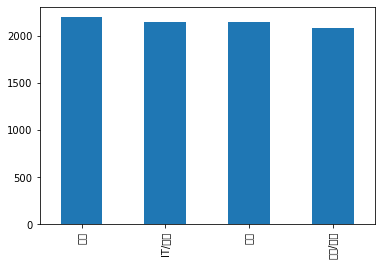

In [103]:
df['code'].value_counts().plot(kind = 'bar')

In [104]:
print(df.groupby('code').size().reset_index(name = 'count'))

    code  count
0  IT/과학   2154
1     경제   2154
2     사회   2199
3  생활/문화   2082


### 3.토큰화

In [105]:
from konlpy.tag import Hannanum
from konlpy.tag import Mecab
from konlpy.tag import Kkma
from konlpy.tag import Komoran
from konlpy.tag import Okt

In [116]:
#tokenizer = Hannanum()
#tokenizer = Mecab()
#tokenizer = Kkma()
#tokenizer = Komoran()
tokenizer = Okt()

kor_text = '밤에 귀가하던 여성에게 범죄를 시도한 대 남성이 구속됐다서울 제주경찰서는 \
            상해 혐의로 씨를 구속해 수사하고 있다고 일 밝혔다씨는 지난달 일 피해 여성을 \
            인근 지하철 역에서부터 따라가 폭행을 시도하려다가 도망간 혐의를 받는다피해 \
            여성이 저항하자 놀란 씨는 도망갔으며 신고를 받고 주변을 수색하던 경찰에 \
            체포됐다피해 여성은 이 과정에서 경미한 부상을 입은 것으로 전해졌다'

#- 형태소 분석, 즉 토큰화(tokenization)를 합니다.
print(tokenizer.morphs(kor_text))

['밤', '에', '귀가', '하던', '여성', '에게', '범죄', '를', '시도', '한', '대', '남성', '이', '구속', '됐다', '서울', '제', '주', '경찰서', '는', '상해', '혐의', '로', '씨', '를', '구속', '해', '수사', '하고', '있다고', '일', '밝혔다', '씨', '는', '지난달', '일', '피해', '여성', '을', '인근', '지하철', '역', '에서부터', '따라가', '폭행', '을', '시도', '하려다가', '도망간', '혐의', '를', '받는다', '피해', '여성', '이', '저항', '하자', '놀란', '씨', '는', '도망갔으며', '신고', '를', '받고', '주변', '을', '수색', '하던', '경찰', '에', '체포', '됐다', '피해', '여성', '은', '이', '과정', '에서', '경미한', '부상', '을', '입은', '것', '으로', '전해졌다']


### 4.불용어(stopwords) 제거

In [117]:
stop_path = os.getenv("HOME") + "/aiffel/news_crawler/stop_fold/stopwords.csv"
st = pd.read_table(stop_path, sep=',')

f = open(stop_path, 'rt')

import csv 
csvfile = csv.reader(f)
stopwords = []

for item in csvfile:
    stopwords.append(item[0])

In [118]:
# 토큰화 및 토큰화 과정에서 불용어를 제거하는 함수입니다.
def preprocessing(data):
  text_data = []

  for sentence in data:
    temp_data = []
    #- 토큰화
    temp_data = tokenizer.morphs(sentence) 
    #- 불용어 제거
    temp_data = [word for word in temp_data if not word in stopwords] 
    text_data.append(temp_data)

  text_data = list(map(' '.join, text_data))

  return text_data

In [119]:
text_data = preprocessing(df['news'])
print(text_data[0])

기사 섹션 분류 안내 기사 섹션 정보 해당 언론사 분류 따르고 있습니다 언론사 개별 기사 개 이상 섹션 중복 분류 할 수 있습니다 닫기


## 머신러닝 사용하기
---

### 1. 모델에 필요한 도구 임포트하기

In [127]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

### 2. 훈련 데이터와 테스트 데이터로 분리

In [128]:
#- 훈련 데이터와 테스트 데이터를 분리합니다.
X_train, X_test, y_train, y_test = train_test_split(text_data, df['code'], random_state = 0)

### 3. 분리된 데이터의 개수를 확인

In [129]:
print('훈련용 뉴스 기사의 개수 :', len(X_train))
print('테스트용 뉴스 기사의 개수 : ', len(X_test))
print('훈련용 레이블의 개수 : ', len(y_train))
print('테스트용 레이블의 개수 : ', len(y_test))

훈련용 뉴스 기사의 개수 : 6441
테스트용 뉴스 기사의 개수 :  2148
훈련용 레이블의 개수 :  6441
테스트용 레이블의 개수 :  2148


### 4. 데이터를 학습하고 문서 데이터를 행렬로 변환하기

In [130]:
#- 단어의 수를 카운트하는 사이킷런의 카운트벡터라이저입니다.
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)

#- 카운트벡터라이저의 결과로부터 TF-IDF 결과를 얻습니다.
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

#- 나이브 베이즈 분류기를 수행합니다.
#- X_train은 TF-IDF 벡터, y_train은 레이블입니다.
clf = MultinomialNB().fit(X_train_tfidf, y_train)

### 5. TF-IDF로 바꾸는 전처리 함수 만들기

In [131]:
def tfidf_vectorizer(data):
  data_counts = count_vect.transform(data)
  data_tfidf = tfidf_transformer.transform(data_counts)
  return data_tfidf

### 6. 모델 성능 평가하기

In [132]:
y_pred = clf.predict(tfidf_vectorizer(X_test))
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       IT/과학       0.74      0.83      0.78       544
          경제       0.88      0.72      0.79       543
          사회       0.73      0.86      0.79       524
       생활/문화       0.83      0.74      0.78       537

    accuracy                           0.79      2148
   macro avg       0.80      0.79      0.79      2148
weighted avg       0.80      0.79      0.79      2148



## 마무리

처음에 주어진 news_data만 가지고 훈련을 했을 때, f1-score는 0.81정도 였습니다.  

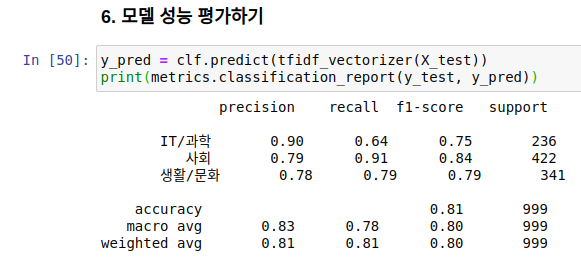

전체적으로 좋은 정확도라고 생각했지만, 사회가 0.84로 치중되어있는 모습을 보았습니다.  
그래서 f1-score을 높이기 위해서 고민해본 결과  

- news_data와 news2_data 합치기
- 불용어 다수 제거하기
- 각 행을 랜덤으로 섞기

위와 같은 생각을 했습니다.  
하지만  

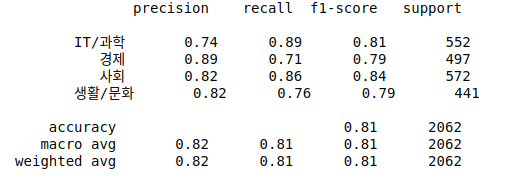  

위와 같이 결과가 더 떨어졌습니다.  
그 다음 생각한 내용이 데이터를 구하는 것이었습니다.  
크롤링은 IP의 문제가 되니 뉴스 빅데이터 사이트 "빅카인즈"에서 추출했습니다. 

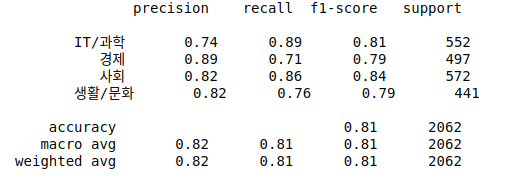  

그랬더니 성능이 개선됨이 보였습니다.